# Sect 40: Neural Networks - Intro to Deep Learning


- 10/20/20
- online-ds-ft-070620

## Learning Objectives

- Start By Discussing Biological Neural Networks (powerpoint)
- Connect back to introduction from Learn
- Demonstrate / play with Neural Network with Tensorflow Playground

## Questions/ Comments


- Intro to Neural Networks Lab:

```python
Train_img_unrow = train_images.reshape(790, -1).T # ←--  Why -1 here?
```

- Can we review the functions in the "math recap" section of the intro to neural networks lab? It would be helpful to discuss what each component of the functions corresponds to in the context of the image classification example used in the lab.


# Biological Neural Networks

> See `sect_40_bio_neural_networks.pptx` for introduction to how biological neurons work. 


# Artificial Neural Networks 

    
- **The purpose of a neural network is to model $\hat y \approx y$ by minimizing loss/cost functions using gradient descent.**

- Neural networks are very good with unstructured data. (images, audio)

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-neural-networks-online-ds-ft-100719/master/images/new_first_network_num.png" width=80%>

- **Networks are comprised of sequential layers of neurons/nodes.**
    - Each neuron applies a **linear transformation** and an **activation function** and outputs its results to all neurons in the next layer.
    - Minimizing Loss functions by adjusting parameters (weights and bias) of each connection using gradient descent (forward and back propagation).

- **Activation functions** control the output of a neuron.($\hat y =f_{activation}(x)$ )
    - Most basic activation function is sigmoid functin ($\hat y =\sigma(x)$)
    - Choice of activation function controls the size/range of the output.
- **Linear transformations** ( $z = w^T x + b$ ) are used control the output of the activation function .
    - where $w^T $ is the weight(/coefficient), $x$ is the input, and  $b$ is a bias. 
        - weights: 
        - bias:
        
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-02-introduction-to-neural-networks-online-ds-ft-021119/master/figures/log_reg.png">



- **Loss functions** ($\mathcal{L}(\hat y, y) $)  measure inconsistency between predicted ($\hat y$) and actual $y$
    - will be optimized using gradient descent
    - defined over 1 traning sample
- **Cost functions** takes the average loss over all of the samples.
    - $J(w,b) = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})$
    - where $l$ is the number of samples


- **Forward propagation** is the calculating  loss and cost functions.
- **Back propagation** involves using gradient descent to update the values for  $w$ and $b$.
    - $w := w- \alpha\displaystyle \frac{dJ(w)}{dw}$ <br><br>
    - $b := b- \alpha\displaystyle \frac{dJ(b)}{db}$

        - where $ \displaystyle \frac{dJ(w)}{dw}$ and $\displaystyle \frac{dJ(b)}{db}$ represent the *slope* of the function $J$ with respect to $w$ and $b$ respectively
        - $\alpha$ denote the *learning rate*. 
        

### A Note On Shapes

- Inputs:
    - $n$: Number of inputs (columns) in the feature vector 
    - $l$: Number of items (rows) in the training set 
    - $m$: Number of items (rows) in the test set
    
- Input X:
    - Will have shape $n$ x $l$ (number of features x number of training data points/rows)

## Tensorflow Playground Demo

- [Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.60007&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/neural_network_steps.png">

### Using the chain rule for updating parameters with sigmoid activation function example:
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-02-introduction-to-neural-networks-online-ds-ft-021119/master/figures/log_reg_deriv.png" >
- $\displaystyle \frac{dJ(w,b)}{dw_i} = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1} \frac{d\mathcal{L}(\hat y^{(i)}, y^{(i)})}{dw_i}$
 
 
- For each training sample $1,...,l$ you'll need to compute:

    - $ z^{(i)} = w^T x^ {(i)} +b $

    - $\hat y^{(i)} = \sigma (z^{(i)})$

    - $dz^{(i)} = \hat y^{(i)}- y^{(i)}$

- Then, you'll need to make update:

    - $J_{+1} = - [y^{(i)} \log (\hat y^{(i)}) + (1-y^{(i)}) \log(1-\hat y^{(i)})$ (for the sigmoid function)

    - $dw_{1, +1}^{(i)} = x_1^{(i)} * dz^{(i)}$

    - $dw_{2, +1}^{(i)} = x_2^{(i)} * dz^{(i)}$

    - $db_{+1}^{(i)} =  dz^{(i)}$

    - $\dfrac{J}{m}$, $\dfrac{dw_1}{m}$, $\dfrac{dw_1}{m}$, $\dfrac{db}{m}$

- After that, update: 

    $w_1 := w_1 - \alpha dw_1$

    $w_2 := w_2 - \alpha dw_2$

    $b := b - \alpha db$

    repeat until convergence!
    
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from functions import *

## Plot activation functions
# act_funcs = [sigmoid,tanh,arctan,relu,leaky_relu]
# [plot_activation(fn) for fn in act_funcs]
  

## Activation Functions (will call $f_a$ here)

- **sigmoid:**<br>
<!-- <img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-04-deeper-neural-networks-online-ds-ft-021119/master/index_files/index_33_1.png" width=200> -->
    - $ f_a=\dfrac{1}{1+ \exp(-z)}$
    - outputs 0 to +1
    

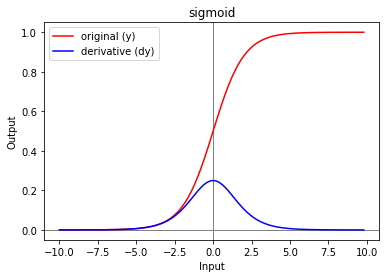

In [2]:
plot_activation(sigmoid)

- **tanh (hyperbolic tan):**<br>
    - $f_a = =\dfrac{\exp(z)- \exp(-z)}{\exp(z)+ \exp(-z)}$
    - outputs -1 to +1
    - Generally works well in intermediate layers
    - one of most popular functions
    

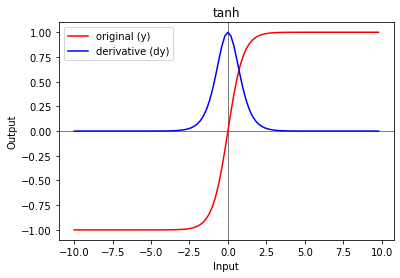

In [3]:
plot_activation(tanh)

- **arctan**
    -  similar qualities as tanh, but slope is more gentle than tanh
    - outputs ~ 1.6 to 1.6
    

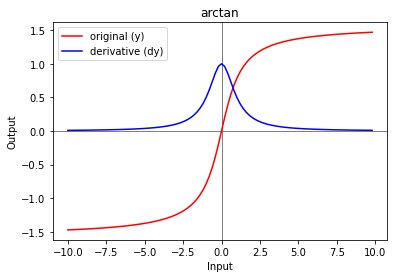

In [4]:
plot_activation(arctan)

-  **Rectified Linear Unit (relu):**<br>
    - most popular activation function
    - Activation is exactly 0 when Z <0
    - Makes taking directives slightly cumbersome
    - $f_a=\max(0,z)$
    

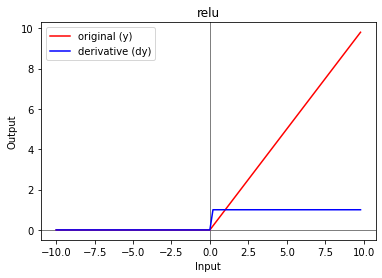

In [5]:
plot_activation(relu)

- **leaky_relu:**
    -  altered version of relu where the activatiom is slightly negative when $z<0$
    - $f_a=\max(0.001*z,z)$

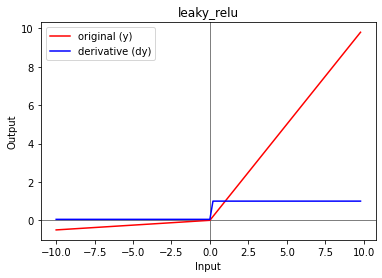

In [6]:
plot_activation(leaky_relu)

>### Next class: Deep Neural Networks
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-neural-networks-onl01-dtsc-ft-070620/master/images/Deeper_network.jpg">

# Intro to Keras


## Keras Basics

- Tensors dimensions:
    - Scalars = 0D tensors
    - Vectors = 1D tensors
    - Matrices = 2D tensors
    - 3D tensors
- A tensor is defined by 3 characteristics:
    - rank or number of axes
    - the shape
    - the data type
- Tensor basics - properties (from [here](https://pgaleone.eu/tensorflow/2018/07/28/understanding-tensorflow-tensors-shape-static-dynamic/#tensors-the-basic)):
    - name
    - type:
        - tf.float32, tf.int64, tf.string
    - rank:
        - the number of dimension or the tensor. 
        - scalar = 0, vector = 1, etc.
    - shape:

### Important Data Manipulations in numpy

- **Unrowing matrices:**
    - e.g. turning a matrix of 790 images, which are 64 x 64 pixels and in RBG (3 colors) a (790, 64, 64, 3) matrix  into a matrix with 1 row for each image a ( 64*64*3, 790) matrix
    - img_unrow = img.reshape(790, -1).T
        - reshape -1 essentially means "figure out how many, based upon the dat'
- **Increasing the rank:**
    - Vector with `np.shape()` returns  `(790,)`
    - `np.reshape(vector, (1, 790))`
- **Tensor indexling/slicing**
    - just as python, `tensor[start_idx : end_idx]`
    - left inclusive, right exclusive

In [7]:
# !pip install -U keras
# !pip install -U tensorflow

Raw Tensor shape: (60000, 28, 28)
Tensor Slice [0:100] shape: (100, 28, 28)
Tensor Slice [0:100] shape: (100, 28, 28)
Tensor Slice [0:100] shape: (100, 28, 28)


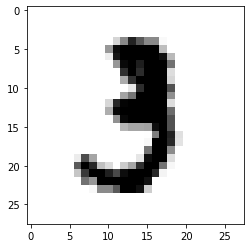

In [8]:
# Tensor indexing example using images
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline  

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[10] #Select an arbitrary case for our example

#Checking the shape of our tensor (in this case, the image)
print('Raw Tensor shape:', train_images.shape)

#Now performing some slices of our image:
print('Tensor Slice [0:100] shape:', train_images[:100].shape)

#Equivalently
print('Tensor Slice [0:100] shape:', train_images[:100, :, :].shape)

#Or verbosely:
print('Tensor Slice [0:100] shape:', train_images[:100, :28, :28].shape)


plt.imshow(digit, cmap=plt.cm.binary) #Display an example image for context
plt.show()


## Basics of Building a Neural Network with Keras:


**Basics of Building a Neural Network with Keras:**
1. Import required modules
2. Decide on a network architecture (have only discussed sequential thus far)
3. Adding layers - specifying layer type, number of neurons, activation functions, and, optionally, the input shape.
4. Compile the model:
    - Specify optimiziers
    - specify loss functions
    - specify metrics

In [9]:
len(train_images), len(test_images)

(60000, 10000)

In [10]:
## Reshape images as (num_images,-1)
train_img_unrow = train_images.reshape(len(train_images), -1)
test_img_unrow = test_images.reshape(len(test_images), -1)

## Scale data
train_img_unrow=train_img_unrow/255
test_img_unrow =test_img_unrow/255


In [11]:
## check train_img_unrow shape
train_img_unrow.shape,test_img_unrow.shape

((60000, 784), (10000, 784))

In [36]:
from keras.utils import to_categorical


In [38]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [42]:
from keras import models
from keras import layers
from keras import optimizers


## Make a Sequential Model with:
## Hidden layer of 10 units with relu activation function
model = models.Sequential()
model.add(layers.Dense(10, activation = 'relu'))

## Add final layer with 1 neuron and activation='sigmoid'
model.add(layers.Dense(10,activation='sigmoid'))

## Compile with optimer as adam, loss as binary_crossentropy, and accuracy as metric
model.compile(optimizer='adam',#optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',#'mse',
              metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Fitting the model (10 epochs, batch size=64, test data as validation data)
history = model.fit(train_img_unrow, train_labels, epochs=10,
                    batch_size=64, validation_split= 0.1)#validation_data=(test_img_unrow, test_labels))

Epoch 1/10
844/844 [==============================] - 1s 1ms/step - loss: 0.6401 - accuracy: 0.8361 - val_loss: 0.2775 - val_accuracy: 0.9253
Epoch 2/10
844/844 [==============================] - 1s 949us/step - loss: 0.3158 - accuracy: 0.9120 - val_loss: 0.2358 - val_accuracy: 0.9342
Epoch 3/10
844/844 [==============================] - 1s 974us/step - loss: 0.2863 - accuracy: 0.9189 - val_loss: 0.2255 - val_accuracy: 0.9360
Epoch 4/10
844/844 [==============================] - 1s 974us/step - loss: 0.2718 - accuracy: 0.9226 - val_loss: 0.2184 - val_accuracy: 0.9368
Epoch 5/10
844/844 [==============================] - 1s 947us/step - loss: 0.2629 - accuracy: 0.9256 - val_loss: 0.2161 - val_accuracy: 0.9393
Epoch 6/10
844/844 [==============================] - 1s 961us/step - loss: 0.2545 - accuracy: 0.9286 - val_loss: 0.2043 - val_accuracy: 0.9433
Epoch 7/10
844/844 [==============================] - 1s 981us/step - loss: 0.2483 - accuracy: 0.9295 - val_loss: 0.2043 - val_accuracy: 0

In [45]:
## check out an individual array's shape from train_img_unrow
train_img_unrow[0].shape

(784,)

5. Training the model
    - `model.fit(X_train, y_train, epochs=20,batch_size=512,validation_data=(x_val,y_val))`
    
    - **batches:**
        - a set of N samples, processed independently in parallel
        - a batch determines how many samples are fed through before back-propagation. 
        - model only updates after a batch is complete.
        - ideally have as large of a batch as your hardware can handle without going out of memory.
            - larger batches usually run faster than smaller ones for evaluation/prediction. 
    - **epoch:**
        - arbitrary cutoff / "one pass over the entire dataset", useful for logging and periodic evaluation
        - when using kera's `model.fit` parameters `validation_data` or `validation_split`, these evaluations run at the end of every epoch.
        - Within Keras can add callbacksto be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).
        
    - **`history =  model.fit()` creates history object with .history attribute.**
        - `history.history()` returns a dictionary of metrics from each epoch. 
            - `history.history['loss']` and `history.history['acc']`
            


In [46]:
import pandas as pd
## Make a dataframe out of history
res_df = pd.DataFrame(history.history)#.plot()
res_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.640060,0.836130,0.277532,0.925333
1,0.315850,0.911963,0.235832,0.934167
2,0.286297,0.918926,0.225542,0.936000
3,0.271798,0.922574,0.218384,0.936833
4,0.262896,0.925611,0.216100,0.939333


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

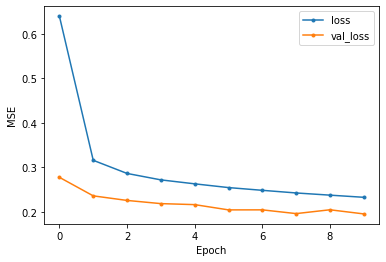

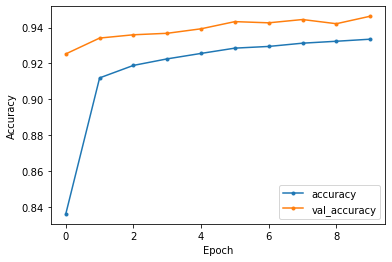

In [47]:
## Plot Losses
ax1 = res_df[[col for col in res_df.columns if 'loss' in col]].plot(marker='.')
ax1.set(xlabel='Epoch',ylabel='MSE')

## Plot accuracy
ax2 = res_df[[col for col in res_df.columns if 'acc' in col]].plot(marker='.')
ax2.set(xlabel='Epoch',ylabel='Accuracy')

In [54]:
## Get pred
y_hat_test = model.predict(test_img_unrow)#(test_img_unrow)
y_hat_test[0]

array([1.3222645e-05, 9.5255977e-11, 8.6891559e-06, 2.3445487e-04,
       5.8869536e-09, 7.0084907e-06, 1.5996554e-10, 7.4112236e-02,
       6.8753270e-06, 4.3655459e-06], dtype=float32)

In [57]:
test_labels.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [55]:
y_hat_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [58]:
y_hat_test=y_hat_test.argmax(axis=1)
y_test =test_labels.argmax(axis=1)


In [50]:
len(y_hat_test)

10000

In [60]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.91      0.92      1032
           3       0.90      0.92      0.91      1010
           4       0.91      0.96      0.93       982
           5       0.93      0.88      0.90       892
           6       0.95      0.96      0.95       958
           7       0.93      0.94      0.94      1028
           8       0.90      0.90      0.90       974
           9       0.94      0.90      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

